In [1]:
# Ponovno uzimamo model ovjesa auta prema s 1. predavanja.
from matplotlib.pyplot import *;
import numpy as np;
from scipy.integrate import *;
from scipy.linalg import *;
from control.matlab import *;
from math import *;

use_numpy_matrix(flag=False, warn=True)

In [2]:
# Fizikalne veličine.
m1 = 2500;   # Masa tijela auta, u kg.
m2 = 320;    # Masa ovjesa, u kg.
k1 = 3000;   # Prva opruga, u N/m.
c1 = 1000;   # Prigušivač, u Ns/m.
k2 = 10000;  # Druga opruga, u N/m.

In [3]:
# Definicija LTI sustava.
A = np.array( [
    [0, 1, 0, 0],
    [-k1/m1, -c1/m1, k1/m1, c1/m1],
    [0, 0, 0, 1],
    [k1/m2, c1/m2, (-k1-k2)/m2, -c1/m2] ] );
B = np.array( [
    [0],
    [0],
    [0],
    [k2/m2] ] );
C = np.array( [
    [1, 0, 0, 0],
    [0, 0, 1, 0] ] );
D = np.array( [
    [0],
    [0] ] );

sys_t = ss( A, B, C, D );

In [4]:
# Je li sustav stabilan? Da.
print( pole( sys_t ) );
print( eigvals( A ) );

[-1.64503733+6.11646727j -1.64503733-6.11646727j -0.11746267+0.95966707j
 -0.11746267-0.95966707j]
[-1.64503733+6.11646727j -1.64503733-6.11646727j -0.11746267+0.95966707j
 -0.11746267-0.95966707j]


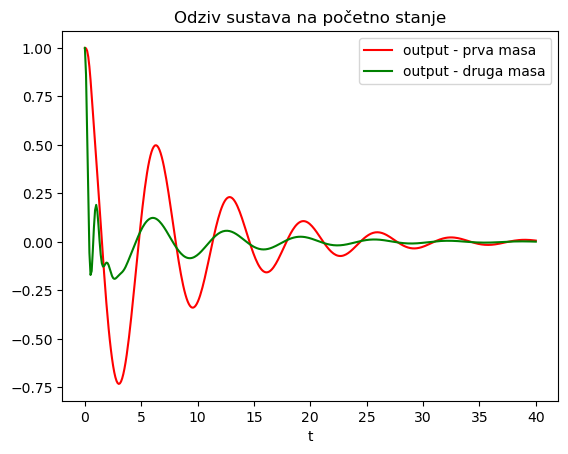

In [5]:
# Odziv na početno stanje: Ako je početno stanje x0, te u(t)=0, koji je izlaz sustava?
x0 = np.array( [ [1], [0], [1], [0] ] );
t = linspace( 0, 40, 400 );

# Funkcija initial daje traženi izlaz.
[yout, tout] = initial( sys_t, t, x0 );

# Crtamo izlaze.
%matplotlib inline

f = figure;
plot( tout, yout[:, 0], 'r-', label='output - prva masa' );
plot( tout, yout[:, 1], 'g-', label='output - druga masa' );
xlabel( 't' );
title( 'Odziv sustava na početno stanje' );
legend();
show();

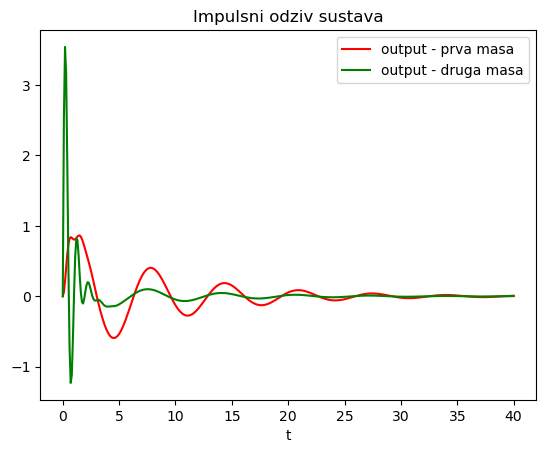

In [6]:
# Impulsni odziv sustava.
t = linspace( 0, 40, 400 );

# Funkcija impulse daje traženi izlaz: yout = C*e^(A*t)*B.
[yout, tout] = impulse( sys_t, t );

# Crtamo izlaze.
%matplotlib inline

f = figure;
plot( tout, yout[:, 0], 'r-', label='output - prva masa' );
plot( tout, yout[:, 1], 'g-', label='output - druga masa' );
xlabel( 't' );
title( 'Impulsni odziv sustava' );
legend();
show();

In [7]:
# H2-norma sustava je ista kao L2-norma impulsnog odziva.
# Provjerimo ovu tvrdnju.

# Prvo aproksimiramo integral od tr(yout(t)'*yout(t)), gdje je yout impulsni odziv.
# Prvo izračunamo skalarne produkte yout(t)'*yout.
n_samples = len(tout);
scal_prods = np.zeros( n_samples );

for i in range(0, n_samples):
    scal_prods[i] = yout[i, :].T @ yout[i, :];

# Koristimo trapeznu formulu (iz scipy.integrate)
H2_integral = sqrt( trapz( scal_prods, tout ) );
print( 'H2-norma pomoću integrala impulsnog odziva: ', H2_integral );

# Zatim, izračunavamo pomoću beskonačnog gramijana.
P = lyap( A, B @ B.T ); # A*P + P*A' + B*B' = 0
H2_gramian = sqrt( np.trace( C @ P @ C.T ) );
print( 'H2-norma pomoću beskonačnog gramijana: ', H2_gramian );

H2-norma pomoću integrala impulsnog odziva:  2.491871161138463
H2-norma pomoću beskonačnog gramijana:  2.492457742871472


/tmp/ipykernel_5818/322958927.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scal_prods[i] = yout[i, :].T @ yout[i, :];


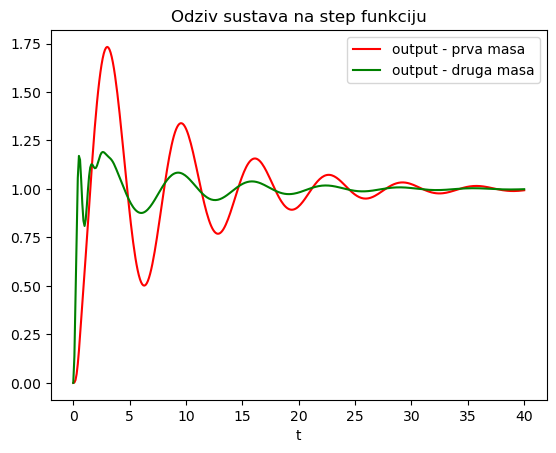

In [8]:
# Odziv sustava na step-funkciju.
t = linspace( 0, 40, 400 );

# Funkcija step daje traženi izlaz.
[yout, tout] = step( sys_t, t );

# Crtamo izlaze.
%matplotlib inline

f = figure;
plot( tout, yout[:, 0], 'r-', label='output - prva masa' );
plot( tout, yout[:, 1], 'g-', label='output - druga masa' );
xlabel( 't' );
title( 'Odziv sustava na step funkciju' );
legend();
show();

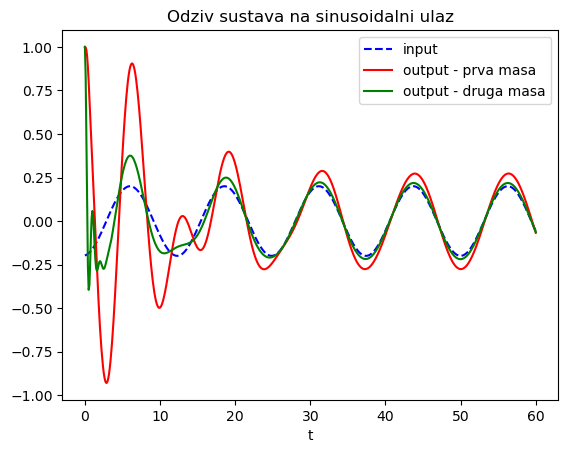

In [9]:
# Sinusoidalni input daje sinusoidalni output (steady state za stabilne sustave).
# Vremenski interval.
t = linspace( 0, 60, 600 );

# Input.
def uu( t ):
    return 0.2*cos( 0.5*t-3 );
    # return 0.2*cos( 4*t ); # protumači smanjenje amplitude -> vidi bode()
    # return 0.2*cos( t-3 ); # protumači porast amolitude i fazni pomak -> vidi bode()
    
u = list( map( uu, t ) );

# Početno stanje.
x0 = np.array( [[1], [0], [1], [0]] );

# Simulacija: yout = izlaz, tout = vremena, xout = stanja.
[yout, tout, xout] = lsim( sys_t, u, t, x0 );

# Crtamo izlaze.
%matplotlib inline

f = figure;
plot( t, u, 'b--', label='input' );
plot( tout, yout[:, 0], 'r-', label='output - prva masa' );
plot( tout, yout[:, 1], 'g-', label='output - druga masa' );
xlabel( 't' );
title( 'Odziv sustava na sinusoidalni ulaz' );
legend();
show();

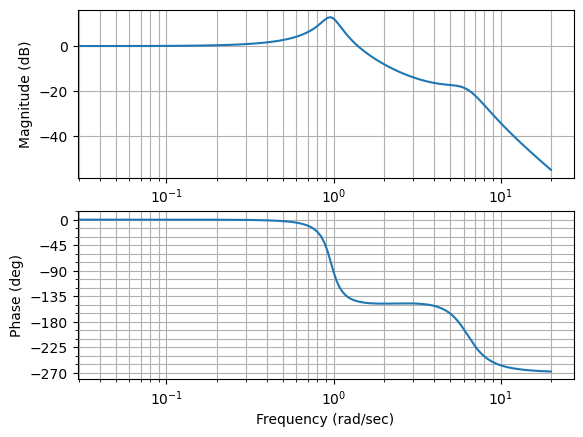

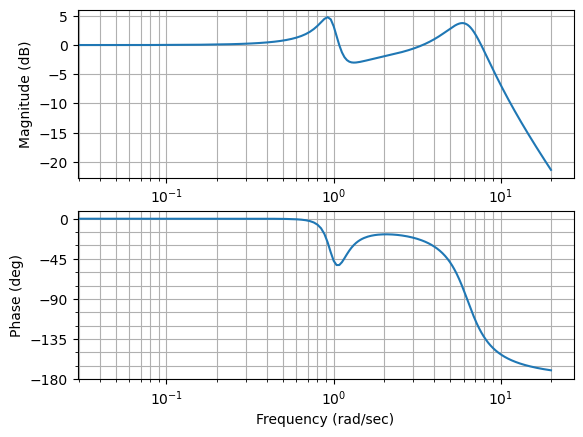

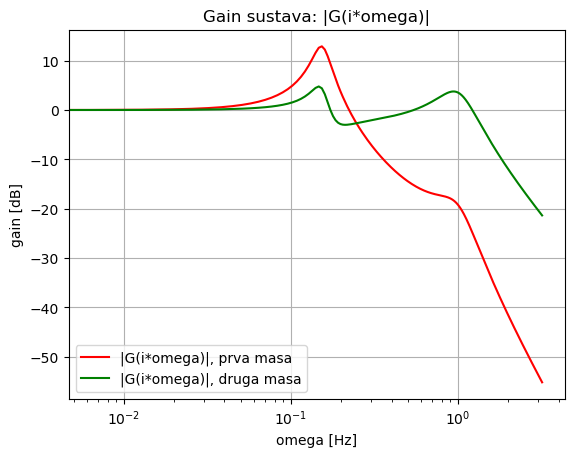

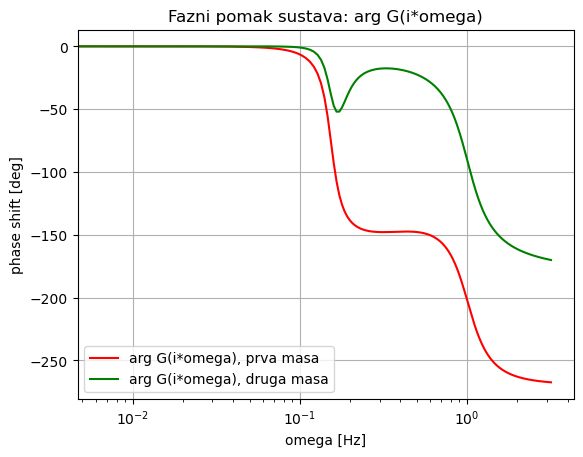

Ista slika, druge mjerne jedinice:


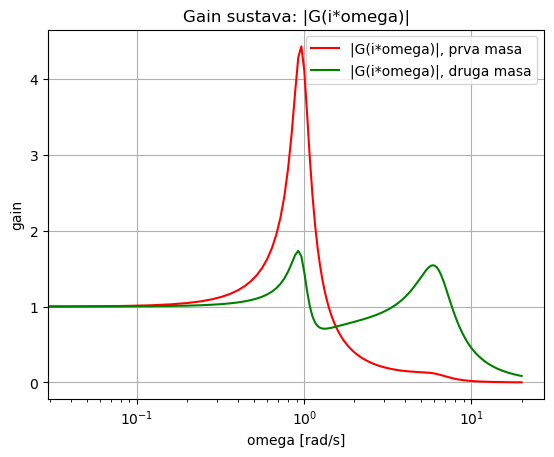

In [10]:
# Amplituda (vidljiva gore) i pomak u fazi (ne vidi se gore jer je mali) 
# izlaza u odnosu na ulaz se mogu pročitati sa "bode" plota sustava.

# Bode plot zasad samo podržava SISO sustave, pa razdvajamo naš sustav na dva, po jedan za svaki output.
sys_1 = ss( A, B, C[0, :], D[0, 0] );
sys_2 = ss( A, B, C[1, :], D[1, 0] );

# Uoči: ne treba uzimati i negativne omega jer je G(-i*om) = conj( G(i*om) ).
omega = linspace( 0, 20, 500 );

# Crtamo bode plot.
%matplotlib inline

f = figure();
[mag_1, phase_1, omega_1] = bode( sys_1, omega );

f = figure();
[mag_2, phase_2, omega_2] = bode( sys_2, omega );


f = figure();
semilogx( omega_1/2/pi, 20*np.log10(mag_1), 'r-', label='|G(i*omega)|, prva masa' );
semilogx( omega_2/2/pi, 20*np.log10(mag_2), 'g-', label='|G(i*omega)|, druga masa' );
xlabel( 'omega [Hz]' );
ylabel( 'gain [dB]' );
title( 'Gain sustava: |G(i*omega)|' );
grid();
legend();
show();

f = figure();
semilogx( omega_1/2/pi, phase_1*180/pi, 'r-', label='arg G(i*omega), prva masa' );
semilogx( omega_2/2/pi, phase_2*180/pi, 'g-', label='arg G(i*omega), druga masa' );
xlabel( 'omega [Hz]' );
ylabel( 'phase shift [deg]' );
title( 'Fazni pomak sustava: arg G(i*omega)' );
grid();
legend();
show();

print( 'Ista slika, druge mjerne jedinice:' );
f = figure();
semilogx( omega_1, mag_1, 'r-', label='|G(i*omega)|, prva masa' );
semilogx( omega_2, mag_2, 'g-', label='|G(i*omega)|, druga masa' );
xlabel( 'omega [rad/s]' );
ylabel( 'gain' );
title( 'Gain sustava: |G(i*omega)|' );
grid();
legend();
show();

In [11]:
# Odavde možemo procijeniti i Hinf normu sustava.
# |G|_Hinf = sup sigma_max |G(i*omega)|
Hinf_norm = 0; peak_omega = 0;
for i in range( 0, len( omega ) ):
    # G(i*omega) = [ [G1], [G2] ]
    # sigma_max( [G1; G2] ) = sqrt( eig_max( [G1; G2]' * [G1; G2] ) ) = sqrt( |G1|^2 + |G2|^2 )
    sigma_1 = sqrt( mag_1[i]*mag_1[i] + mag_2[i]*mag_2[i] );
    if( sigma_1 > Hinf_norm ):
        Hinf_norm = sigma_1;
        peak_omega = omega[i];
        
print( 'Hinf_norm = ', Hinf_norm, ', peak omega = ', peak_omega ); 
# (Slično daje i Matlabova naredba [Hinf_norm, peak_omega] = hinfnorm( sys_t ) ).

Hinf_norm =  4.729509530750406 , peak omega =  0.9619238476953907
